In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from scipy.stats import chisquare

# Allstate Claims Severity
#### By Tinh Nguyen, Suman Tripathy, AC Dela Paz, Joelynn Deng

In [2]:
# Importing data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")   # save til end

train_y = train['loss']
train_X = train.drop('loss', axis=1)

In [3]:
train_X = train_X.drop('id', axis=1)

In [4]:
local_train_X, local_test_X, local_train_y, local_test_y = train_test_split(train_X, train_y, test_size=0.2) 

## Data Exploration

In this section of the notebook, we'll conduct
 - Null values
 - Standard statistical analysis
 - Correlation

In [5]:
print(list(train.columns))

['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', '

In [6]:
print("Number of null values: ", train.isnull().sum().sum())

Number of null values:  0


In [7]:
local_train_X.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000
mean,0.494160,0.507305,0.498893,0.491923,0.487550,0.491017,0.484892,0.486574,0.485648,0.498296,0.493571,0.493220,0.493160,0.495719
std,0.187653,0.207273,0.201747,0.211154,0.209106,0.205289,0.178385,0.199467,0.181646,0.185867,0.209735,0.209429,0.212756,0.222438
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.347403,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.317960,0.358970,0.364580,0.310961,0.314945,0.315758,0.294632
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440221,0.438285,0.441060,0.437310,0.461190,0.457203,0.462286,0.363547,0.407411
75%,0.625272,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.568890,0.614590,0.678924,0.679096,0.689974,0.724610
max,0.984975,0.862654,0.944251,0.952482,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


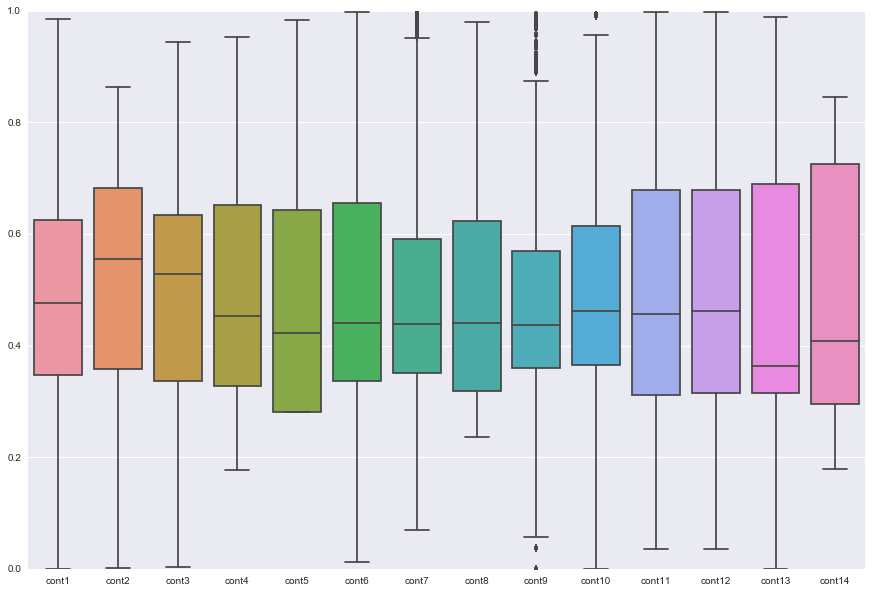

In [8]:
p = re.compile('cont[0-9]+')

cont_features = [c for c in train.columns if p.match(c)]
plt.figure(figsize=(15, 10))
sns.boxplot(data=local_train_X[cont_features])

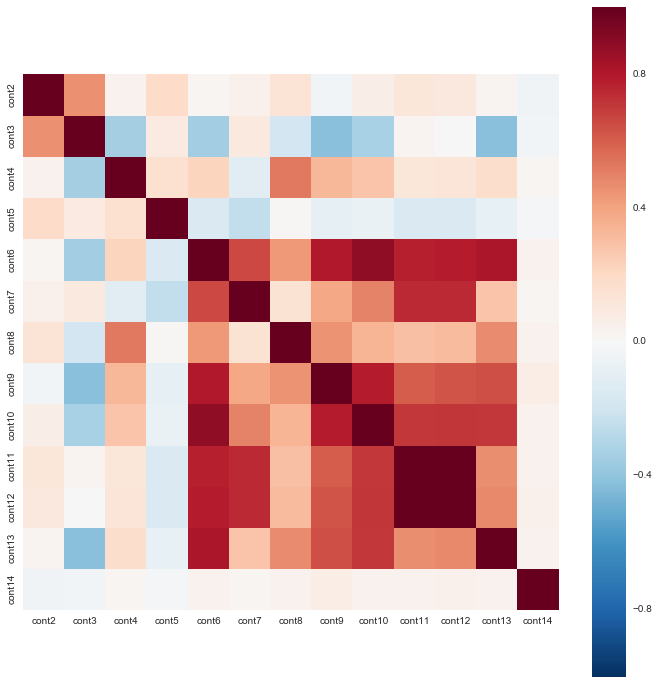

In [9]:
corr = local_train_X[cont_features].iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [10]:
# What are the most correlated variables?
s = corr.abs().unstack()
sorted_corr = s.order(kind='quicksort', ascending=False)
sorted_corr = sorted_corr[sorted_corr != 1.0]

/Users/tinhnguyen/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


In [11]:
# Top 10 Correlations
sorted_corr.drop_duplicates()[:10]

cont11  cont12    0.994355
cont6   cont10    0.884028
cont13  cont6     0.815492
cont6   cont9     0.797495
cont12  cont6     0.786236
cont9   cont10    0.785404
cont6   cont11    0.774834
cont11  cont7     0.747567
cont7   cont12    0.743125
cont10  cont12    0.715213
dtype: float64

## Feature Engineering

Take a look at dmi3kno's kernel on feature engineering. (https://www.kaggle.com/dmi3kno/allstate-claims-severity/all-the-allstate-states-eda/code)
    - Can we extract states from the data?
    - From dmi3kno's kernel, we gain some insight to see how to make sense of the categorical variables.
    - Looking at cat112, there are 51, So let's try to cross correlate with population data (https://www.census.gov/popest/data/state/totals/2015/tables/NST-EST2015-01.csv)

In [12]:
# Number of unique variables for each column
for col in test.columns:
    print(col, train[col].nunique())

id 188318
cat1 2
cat2 2
cat3 2
cat4 2
cat5 2
cat6 2
cat7 2
cat8 2
cat9 2
cat10 2
cat11 2
cat12 2
cat13 2
cat14 2
cat15 2
cat16 2
cat17 2
cat18 2
cat19 2
cat20 2
cat21 2
cat22 2
cat23 2
cat24 2
cat25 2
cat26 2
cat27 2
cat28 2
cat29 2
cat30 2
cat31 2
cat32 2
cat33 2
cat34 2
cat35 2
cat36 2
cat37 2
cat38 2
cat39 2
cat40 2
cat41 2
cat42 2
cat43 2
cat44 2
cat45 2
cat46 2
cat47 2
cat48 2
cat49 2
cat50 2
cat51 2
cat52 2
cat53 2
cat54 2
cat55 2
cat56 2
cat57 2
cat58 2
cat59 2
cat60 2
cat61 2
cat62 2
cat63 2
cat64 2
cat65 2
cat66 2
cat67 2
cat68 2
cat69 2
cat70 2
cat71 2
cat72 2
cat73 3
cat74 3
cat75 3
cat76 3
cat77 4
cat78 4
cat79 4
cat80 4
cat81 4
cat82 4
cat83 4
cat84 4
cat85 4
cat86 4
cat87 4
cat88 4
cat89 8
cat90 7
cat91 8
cat92 7
cat93 5
cat94 7
cat95 5
cat96 8
cat97 7
cat98 5
cat99 16
cat100 15
cat101 19
cat102 9
cat103 13
cat104 17
cat105 20
cat106 17
cat107 20
cat108 11
cat109 84
cat110 131
cat111 16
cat112 51
cat113 61
cat114 19
cat115 23
cat116 326
cont1 647
cont2 33
cont3 76
cont4 1

In [13]:
state_pop = pd.read_csv('https://www.census.gov/popest/data/state/totals/2015/tables/NST-EST2015-01.csv')
# Grabbing necessary rows only
new_columns = state_pop.loc[2, :]
new_columns[0] = 'State'
state_pop = state_pop.loc[range(8, 59),:]
state_pop.columns = new_columns

In [14]:
# Converting from string ('249,924' -> 249924.0)
int_cols = ['Census', 'Estimates Base', '2010', '2011', '2012', '2013', '2014', '2015']
for col in int_cols:
    state_pop[col] = state_pop[col].map(lambda x: x.replace(',', '')).astype(float)

In [15]:
total_pop = state_pop['Census'].sum()
state_pop['freq'] = state_pop['Census']/total_pop
state_pop.head()

2,State,Census,Estimates Base,2010,2011,2012,2013,2014,2015,freq
8,.Alabama,4779736.0,4780127.0,4785161.0,4801108.0,4816089.0,4830533.0,4846411.0,4858979.0,0.015481
9,.Alaska,710231.0,710249.0,714021.0,722720.0,731228.0,737442.0,737046.0,738432.0,0.002300
10,.Arizona,6392017.0,6392307.0,6408208.0,6468732.0,6553262.0,6630799.0,6728783.0,6828065.0,0.020703
11,.Arkansas,2915918.0,2915958.0,2922394.0,2938538.0,2949499.0,2957957.0,2966835.0,2978204.0,0.009444
12,.California,37253956.0,37254503.0,37334079.0,37700034.0,38056055.0,38414128.0,38792291.0,39144818.0,0.120662


In [16]:
possible_state_freq = local_train_X['cat112'].value_counts()
possible_state_freq = possible_state_freq.sort_values(ascending=False) / possible_state_freq.sum()
allState_state = possible_state_freq.axes[0].tolist()

In [17]:
state_order = state_pop.sort_values(by='freq', ascending=False)['State'].map(lambda x: x.replace('.', ''))
state_order = state_order.tolist()


In [18]:
print('Label', 'Predicted-State')
for i, j in enumerate(allState_state):
    print(j, state_order[i])

Label Predicted-State
E California
AH Texas
AS New York
J Florida
AF Illinois
AN Pennsylvania
N Ohio
U Michigan
AV Georgia
AK North Carolina
K New Jersey
AI Virginia
S Washington
AP Massachusetts
F Indiana
G Arizona
AW Tennessee
A Missouri
AR Maryland
C Wisconsin
O Minnesota
D Colorado
AD Alabama
AY South Carolina
Y Louisiana
AG Kentucky
AA Oregon
AT Oklahoma
AM Connecticut
AL Iowa
R Mississippi
AX Arkansas
I Kansas
X Utah
AE Nevada
Q New Mexico
V West Virginia
H Nebraska
AO Idaho
T Hawaii
L Maine
AC New Hampshire
W Rhode Island
M Montana
AU Delaware
P South Dakota
B Alaska
AB North Dakota
BA Vermont
AJ District of Columbia
AQ Wyoming


Just from inspection, this seems like a good argument. We have gained some intuition that 'cat112' may be the state column. We'll conduct a chi-squared test, the observed data being our all-state state distribution and predicted being census population data.

In [19]:
chi, p = chisquare(possible_state_freq, state_pop['freq'])
print(p, chi)

0.999999999999 7.8916053117


A p-value of 0.9999 indicates that our null hypothesis is very likely (almost 100%) to be true. Thus, we can be confident in assuming these are the correct labels for states.

So let's make this modification across all datasets.

In [20]:
# So let's map our categorical variables in cat112 to statenames
local_train_X['cat112'] = local_train_X['cat112'].map(lambda x: state_order[allState_state.index(x)])
local_test_X['cat112'] = local_test_X['cat112'].map(lambda x: state_order[allState_state.index(x)])
test['cat112'] = test['cat112'].map(lambda x: state_order[allState_state.index(x)])

/Users/tinhnguyen/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/tinhnguyen/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Additionally, let's transform all the categorical variables to numbers. Each category is given a specific number (number only represents category, comparisons other than != do not mean anything).

In [21]:
for col in local_train_X.columns:
    if re.match('cat[0-9]+', col):
        s = np.union1d(train[col].unique().tolist(), test[col].unique().tolist()).tolist()
        local_train_X[col] = local_train_X[col].map(lambda x: s.index(x))
        local_test_X[col] = local_test_X[col].map(lambda x: s.index(x))
        test[col] = test[col].map(lambda x: s.index(x))

/Users/tinhnguyen/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tinhnguyen/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
def MAE(yhat, y):
    return np.abs(yhat - y).sum()/len(yhat)

## Model Building


## Linear Model

Let's try a basic linear model with regularization! 

In [23]:
reg = linear_model.Ridge(alpha=0.1)
reg.fit(local_train_X.as_matrix(), local_train_y.as_matrix())

ypred_train = reg.predict(local_train_X.as_matrix())
ypred_test = reg.predict(local_test_X.as_matrix())

print('MAE train', MAE(ypred_train, local_train_y.as_matrix()))
print('MAE test', MAE(ypred_test, local_test_y.as_matrix()))

MAE train 1330.54882685
MAE test 1327.39370745


## Lasso Linear Model


In [39]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(local_train_X.as_matrix(), local_train_y.as_matrix())

ypred_train = lasso.predict(local_train_X.as_matrix())
ypred_test = lasso.predict(local_test_X.as_matrix())

print('MAE train', MAE(ypred_train, local_train_y.as_matrix()))
print('MAE test', MAE(ypred_test, local_test_y.as_matrix()))

MAE train 1330.413211
MAE test 1327.34273392


In [40]:
# Lasso on log(y)
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(local_train_X.as_matrix(), np.log(local_train_y.as_matrix()))

ypred_train = lasso.predict(local_train_X.as_matrix())
ypred_test = lasso.predict(local_test_X.as_matrix())

print('MAE train', MAE(np.exp(ypred_train), local_train_y.as_matrix()))
print('MAE test', MAE(np.exp(ypred_test), local_test_y.as_matrix()))

MAE train 1476.00147284
MAE test 1480.66627758


## An Attempt at Gradient Boosting (XGB)

Special thanks to <b>guyko</b> for an introduction to xgb package. (https://www.kaggle.com/guyko81/allstate-claims-severity/just-an-easy-solution/)

#### Installation Instructions

 - git clone https://github.com/dmlc/xgboost.git
 - cd xgboost; ./build.sh
 - cd python-package; python setup.py install

In [24]:
from scipy.stats import norm, lognorm
import xgboost as xgb

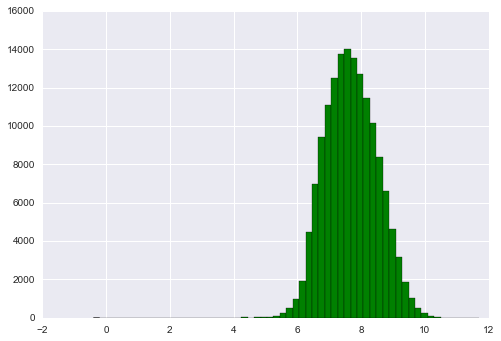

In [25]:
log_loss = np.log(local_train_y)
mu, sigma = norm.fit(log_loss)
plt.hist(log_loss, bins=60, facecolor='green')
plt.show()

From the looks of the log-loss distribution, it seems to be normally distributed. So let's try to fit a linear model to it.

In [26]:
# Using the same parameters as guyko
dtrain = xgb.DMatrix(data=local_train_X, label=log_loss)

params = {'eta': 0.01, 'seed':0, 'subsample': 0.5, 'colsample_bytree': 0.5, 
             'objective': 'reg:linear', 'max_depth':6, 'min_child_weight':3,
             'eval_metrix':'mae'} 
num_rounds = 1000
bst = xgb.train(params, dtrain, num_boost_round = num_rounds)

In [27]:
dt = xgb.DMatrix(data=local_train_X)
y_pred = np.exp(bst.predict(dt))


In [28]:
MAE(y_pred, local_train_y.as_matrix())

1126.5375443501471

In [29]:
dtest = xgb.DMatrix(data=local_test_X)
y_pred = np.exp(bst.predict(dtest))
MAE(y_pred, local_test_y.as_matrix())

1160.4571918087281

In [30]:
test_id = test['id']
test = test.drop('id', axis=1)
dTest = xgb.DMatrix(data=test)
test_predictions = np.exp(bst.predict(dTest))

In [31]:
len(test_predictions)

125546

In [37]:
import csv
def writeCSV(predictions, id_vals):
    with open('predictions.csv', 'w') as csvfile:
        w = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
        w.writerow(['id', 'loss'])
        for i in range(0, len(predictions)):
            w.writerow([id_vals[i], predictions[i]])

In [41]:
writeCSV(test_predictions, test_id)

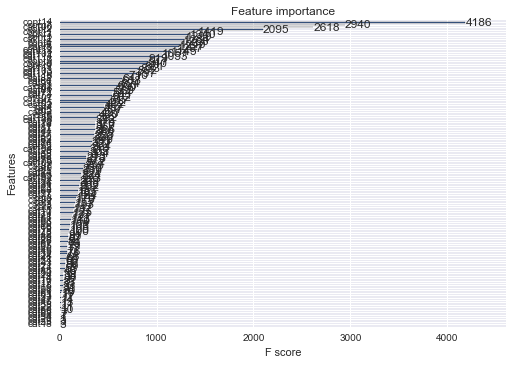

In [47]:
xgb.plot_importance(bst)

#### Taken by Faron 
(https://www.kaggle.com/mmueller/liberty-mutual-group-property-inspection-prediction/xgb-feature-importance-python/code)

In [50]:
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

    outfile.close()

In [ ]:
create_feature_map(train.columns)